In [9]:
import os
import random
import subprocess
import matplotlib.pyplot as plt
import cv2
import numpy as np
import itertools


In [2]:
# Set the path to the folder containing images
image_folder = '/home/huandong/CV/dataset_clean/images/val/'

# Get all image files from the folder
image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg')]

num_pics=20
selected_images = random.sample(image_files, num_pics)

In [4]:
# Path to your detect.py script
detect_script = '/home/huandong/CV/yolov9/detect.py'

# Path to your trained model weights
model_weights = '/home/huandong/CV/yolov9/runs/train/exp6/weights/best.pt'

# Device configuration (use 'mps' for Apple Silicon GPU, 'cpu' or 'cuda' for others)
device = '0'

# Loop through selected images and run detection
for image in selected_images:
    image_path = os.path.join(image_folder, image)
    output_folder_name = 'val_pictures'  # you might want to adjust this for images
    cmd = f'python {detect_script} --weights {model_weights} --exist-ok --source {image_path} --name {output_folder_name} --device {device}'
    subprocess.run(cmd, shell=True)


detect: weights=['/home/huandong/CV/yolov9/runs/train/exp6/weights/best.pt'], source=/home/huandong/CV/dataset_clean/images/val/ZzMoT0UahKrIDZJDqu0PqA.jpg, data=yolov9/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov9/runs/detect, name=val_pictures, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.11.7 torch-2.2.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24245MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25436403 parameters, 0 gradients, 102.6 GFLOPs
image 1/1 /home/huandong/CV/dataset_clean/images/val/ZzMoT0UahKrIDZJDqu0PqA.jpg: 480x640 (no detections), 76.5ms
Speed: 0.3ms pre-process, 76.5ms inference, 18.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov9/runs/detect

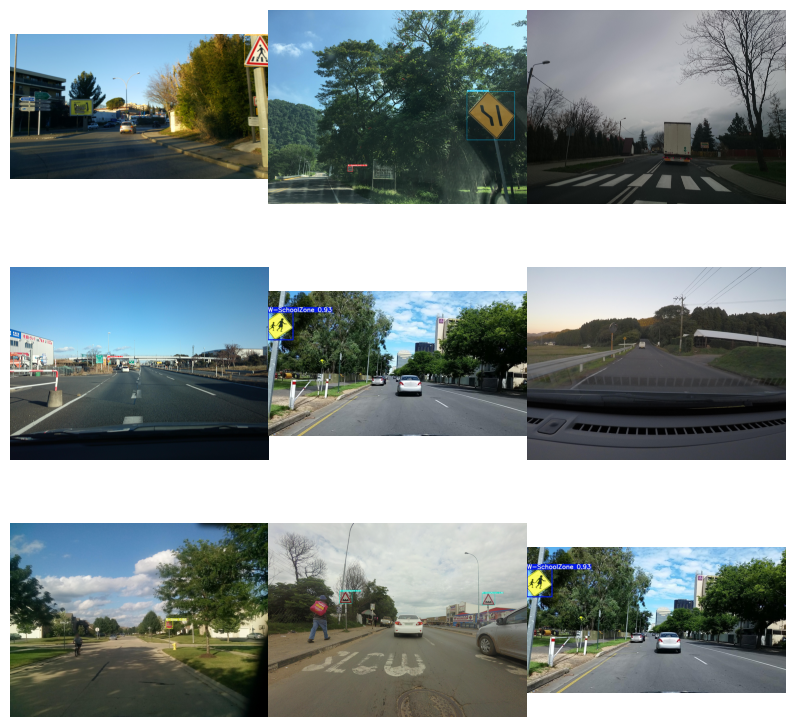

In [14]:
%matplotlib inline
fig, ax = plt.subplots(3,3, figsize=(10,10))
plt.subplots_adjust(wspace=0, hspace=0)


imgnames = os.listdir('/home/huandong/CV/yolov9/runs/detect/val_pictures')

for i,j in itertools.product(range(3), range(3)):
    imgname = np.random.choice(imgnames)
    img = cv2.imread(f'/home/huandong/CV/yolov9/runs/detect/val_pictures/{imgname}')
    ax[i, j].axis('off')
    ax[i,j].imshow(cv2.cvtColor(np.squeeze(img), cv2.COLOR_BGR2RGB))